In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np

sys.path.append('../')
from src.wall.wall import Side, SolidLayer, AirLayer, Cell, Envelope
from src.wall import wall
#from src.temperature import Temperature

# Calculation of Envelope Part

## 1. Basic Class

### 1) Side Class

This class is data class which have the parameters 'minus side' and 'plus side'.

In [2]:
x = Side(mns=1.2, pls=0.8)
x.mns, x.pls

(1.2, 0.8)

## 2. Layer Class

### 1) Solid Layer Class

#### Outline

This class has the properties below:  
- thermal conductivity, W m<sup>-1</sup> K<sup>-1</sup>  
- volumetric specific heat, J m<sup>-3</sup> K<sup>-1</sup>  
- thickness, m  
- division number.

These parameters should be positive.

#### Example

In [3]:
s = SolidLayer(conductivity=1.2, specific_heat=100.0, thickness=0.12, division_number=10)
s.conductivity, s.specific_heat, s.thickness, s.division_number, s.delta_x

(1.2, 100.0, 0.12, 10, 0.012)

### 2) Air Layer Class

#### Outline

This class has the properties below:  
- thermal resistance, m <sup>2</sup> K W <sup>-1</sup>  

#### Example

In [4]:
a = AirLayer(resistance=0.1)
a.resistance

0.1

## 3. Cell Class

### 1) Outline

This class has the properties below:  
- thermal resistance, m <sup>2</sup> K W <sup>-1</sup>  
- capacity, J m <sup>-2</sup> K <sup>-1</sup>
- temperature, degree C

### 2) create function

This function make the list of the class 'Ceell'.  
The arguments are below:  
- the list of layers class  
- initial temperature, degree C

#### Example

In [5]:
cs = Cell.create(
    layers=[
        SolidLayer(conductivity=1.2, specific_heat=100.0, thickness=0.12, division_number=3),
        AirLayer(resistance=120.0),
        SolidLayer(conductivity=1.2, specific_heat=100.0, thickness=0.12, division_number=3),
        SolidLayer(conductivity=1.2, specific_heat=100.0, thickness=0.12, division_number=3),
        AirLayer(resistance=120.0),
        SolidLayer(conductivity=1.2, specific_heat=100.0, thickness=0.12, division_number=6),
    ],
    initial_temp=15.0
)

In [6]:
for c in cs:
    print(c.get_property())

{'res-': 'surfaceMns', 'res+': 0.016666666666666666, 'cap': 2.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 60.0, 'cap': 2.0, 'temp': 15.0}
{'res-': 60.0, 'res+': 0.016666666666666666, 'cap': 2.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 60.0, 'cap': 2.0, 'temp': 15.0}
{'res-': 60.0, 'res+': 0.008333333333333333, 'cap': 1.0, 'temp': 15.0}
{'res-': 0.00833333333333333

## 4. Envelope Class

### 1) Outline

Property of Envelope Class is below:  
- List of Class Cell
- Envelope's name
- long wave emittance of each side

### 2) create function

In [7]:
e2 = Envelope.create(
    name='test2',
    layers=[
        SolidLayer(conductivity=1.2, specific_heat=100000.0, thickness=0.12, division_number=3),
        AirLayer(resistance=120.0),
        SolidLayer(conductivity=1.2, specific_heat=100000.0, thickness=0.12, division_number=3),
        SolidLayer(conductivity=1.2, specific_heat=100000.0, thickness=0.12, division_number=3),
        AirLayer(resistance=120.0),
        SolidLayer(conductivity=1.2, specific_heat=100000.0, thickness=0.12, division_number=6),
    ],
    initial_temp=15.0,
    long_wave_emissivity=Side(0.0, 0.0)
)

In [8]:
for c in e2.cells:
    print(c.get_property())

{'res-': 'surfaceMns', 'res+': 0.016666666666666666, 'cap': 2000.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4000.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4000.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 60.0, 'cap': 2000.0, 'temp': 15.0}
{'res-': 60.0, 'res+': 0.016666666666666666, 'cap': 2000.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4000.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4000.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4000.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4000.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4000.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 60.0, 'cap': 2000.0, 'temp': 15.0}
{'res-': 60.0, 'res+': 0.008333333333333333, 'cap': 1000.0, 'temp'

In [9]:
e2.long_wave_emissivity

Side(mns=0.0, pls=0.0)

In [10]:
e2.name

'test2'

### 3) show_all_temperature function

In [11]:
e2.show_all_temperature()

[15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0]

### 4) show_temperature function

In [12]:
try:
    e2.show_temperature(-1)
except IndexError as e:
    print(e)

Index should be over zero.


In [13]:
try:
    e2.show_temperature(50)
except IndexError as e:
    print(e)

Index is over the number of cells.


In [14]:
e2.show_temperature(10)

15.0

### 5) show_surface_temperatures function

In [15]:
e2.show_surface_temperature()

Side(mns=15.0, pls=15.0)

### 6) set_surface_temperature function

In [16]:
e2.show_surface_temperature()

Side(mns=15.0, pls=15.0)

In [17]:
e2.set_surface_temperature(Side(12.0, None))

In [18]:
e2.show_surface_temperature()

Side(mns=12.0, pls=15.0)

In [19]:
e2.set_surface_temperature(Side(None, 9.0))

In [20]:
e2.show_surface_temperature()

Side(mns=12.0, pls=9.0)

In [21]:
e2.set_surface_temperature(Side(16.0, 16.0))

In [22]:
e2.show_surface_temperature()

Side(mns=16.0, pls=16.0)

### 3) Calculate New Temperatures

#### Function

{'res-': 'surfaceMns', 'res+': 0.016666666666666666, 'cap': 2000.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4000.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4000.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.04, 'cap': 2000.0, 'temp': 15.0}
{'res-': 0.04, 'res+': 0.39999999999999997, 'cap': 2000.0, 'temp': 15.0}
{'res-': 0.39999999999999997, 'res+': 0.39999999999999997, 'cap': 4000.0, 'temp': 15.0}
{'res-': 0.39999999999999997, 'res+': 0.39999999999999997, 'cap': 4000.0, 'temp': 15.0}
{'res-': 0.39999999999999997, 'res+': 0.016666666666666666, 'cap': 4000.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4000.0, 'temp': 15.0}
{'res-': 0.016666666666666666, 'res+': 0.016666666666666666, 'cap': 4000.0, 'temp': 15.0}
{'res-': 0.03333333333333333, 'res+': 'surfacePls', 'cap': 2000.0, 'temp': 15.0}


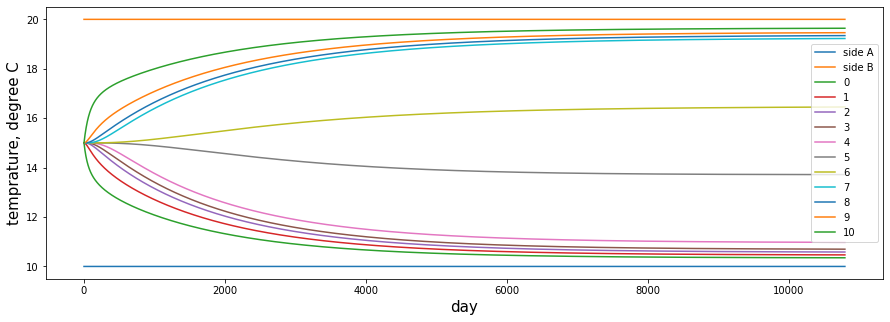

In [25]:
e3 = Envelope.create(
    name='test2',
    layers=[
        SolidLayer(conductivity=1.2, specific_heat=100000.0, thickness=0.12, division_number=3),
        AirLayer(resistance=0.08),
        SolidLayer(conductivity=0.05, specific_heat=100000.0, thickness=0.12, division_number=3),
        SolidLayer(conductivity=1.2, specific_heat=100000.0, thickness=0.12, division_number=3),
    ],
    initial_temp=15.0,
    long_wave_emissivity=Side(0.0, 0.0)
)

for c in e3.cells:
    print(c.get_property())

n = 10800

air_temps_side_a = np.full(n, 10.0)
air_temps_side_b = np.full(n, 20.0)

ts = np.zeros((e3.n_cells, n))
for i, (t_a, t_b) in enumerate(zip(air_temps_side_a, air_temps_side_b)):
    ts[:, i] = np.array(e3.show_all_temperature())
    e3.update_temp(
        surf_resistance = Side(0.1, 0.1), 
        air_temp = Side(t_a, t_b), 
        dt = 1.0, 
        lwave = Side(0.0, 0.0)
    )

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)

ax.plot(range(n), air_temps_side_a, label='side A')
ax.plot(range(n), air_temps_side_b, label='side B')

for j in range(e3.n_cells):
    ax.plot(range(n), ts[j, :], label=str(j))

ax.set_xlabel('day', fontsize = 15)
ax.set_ylabel('temprature, degree C', fontsize = 15)

plt.legend()

plt.show()
